In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
dataset = pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t",quoting=3);
dataset

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]

In [ ]:
dataset.size

2000

In [ ]:
dataset.shape

(1000, 2)

In [ ]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
dataset.head(20)


Review  Liked
0                            Wow... Loved this place.      1
1                                  Crust is not good.      0
2           Not tasty and the texture was just nasty.      0
3   Stopped by during the late May bank holiday of...      1
4   The selection on the menu was great and so wer...      1
5      Now I am getting angry and I want my damn pho.      0
6               Honeslty it didn't taste THAT fresh.)      0
7   The potatoes were like rubber and you could te...      0
8                           The fries were great too.      1
9                                      A great touch.      1
10                           Service was very prompt.      1
11                                 Would not go back.      0
12  The cashier had no care what so ever on what I...      0
13  I tried the Cape Cod ravoli, chicken, with cra...      1
14  I was disgusted because I was pretty sure that...      0
15  I was shocked because no signs indicate cash o...      0
16                                Highly recommended.      1
17             Waitress was a little slow in service.      0
18  This place is not worth your time, let alone V...      0
19                               did not like at all.      0

In [ ]:
dataset.tail(20)

Review  Liked
980  I have been to very few places to eat that und...      0
981  We started with the tuna sashimi which was bro...      0
982                            Food was below average.      0
983  It sure does beat the nachos at the movies but...      0
984       All in all, Ha Long Bay was a bit of a flop.      0
985  The problem I have is that they charge $11.99 ...      0
986  Shrimp- When I unwrapped it (I live only 1/2 a...      0
987     It lacked flavor, seemed undercooked, and dry.      0
988  It really is impressive that the place hasn't ...      0
989  I would avoid this place if you are staying in...      0
990  The refried beans that came with my meal were ...      0
991         Spend your money and time some place else.      0
992  A lady at the table next to us found a live gr...      0
993            the presentation of the food was awful.      0
994           I can't tell you how disappointed I was.      0
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

In [ ]:
dataset.describe()


Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000

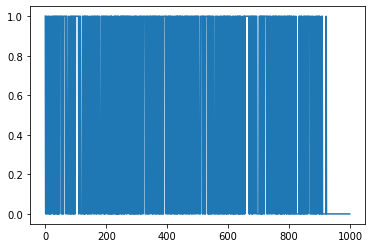

In [ ]:
plt.plot(dataset.Liked)

In [ ]:
man = dataset.Liked<1


In [ ]:
man.head(10)


0    False
1     True
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9    False
Name: Liked, dtype: bool

In [ ]:
man


0      False
1       True
2       True
3      False
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: Liked, Length: 1000, dtype: bool

In [ ]:
import re
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

#len(dataset)

for i in range (0,len(dataset)):
  
  #replace every character other than alpahbets with a space and convert all the letters into lowercase and split each word and
  #put into the list 

  review = re.sub('[^a-zA-z]',' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()

  #next step is stemming , which is replacing every word with its root word , for example, replace loved and loving with love
  #Also remove all the stopwords , by doing above operation , we can reduce the dimension of vector in our bag of words model

  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')

  ps = PorterStemmer()
  cleanedData = ''
  for word in review :
    if word not in set(all_stopwords):
      cleanedData += " " + (ps.stem(word))
  corpus.append(cleanedData)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

print(corpus)

[' wow love place', ' crust not good', ' not tasti textur nasti', ' stop late may bank holiday rick steve recommend love', ' select menu great price', ' get angri want damn pho', ' honeslti tast fresh', ' potato like rubber could tell made ahead time kept warmer', ' fri great', ' great touch', ' servic prompt', ' would not go back', ' cashier care ever say still end wayyy overpr', ' tri cape cod ravoli chicken cranberri mmmm', ' disgust pretti sure human hair', ' shock sign indic cash', ' highli recommend', ' waitress littl slow servic', ' place not worth time let alon vega', ' not like', ' burritto blah', ' food amaz', ' servic also cute', ' could care less interior beauti', ' perform', ' right red velvet cake ohhh stuff good', ' never brought salad ask', ' hole wall great mexican street taco friendli staff', ' took hour get food tabl restaur food luke warm sever run around like total overwhelm', ' worst salmon sashimi', ' also combo like burger fri beer decent deal', ' like final blo

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) #take the most frequent
x = cv.fit_transform(corpus).toarray() #review will be in 0 or 1
y = dataset.iloc[:, -1].values


In [ ]:
print((len(x)))

1000


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[55 42]
 [12 91]]


0.73

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm


array([[55, 42],
       [12, 91]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 42]
 [12 91]]


In [ ]:
res = accuracy_score(y_test, y_pred)
res

0.73

In [ ]:
df = res*100


In [ ]:
if df < 20.0:
  print("1 star * \n basic accommodation, small rooms; these properties do not guarantee ensuite bathrooms, 24-hour reception, or daily cleaning. Think hostels or backpacker motel rooms.");
elif df>20.0 and  df<=40.0:
  print("2 star **\n often, two-star hotels are in old buildings that can’t be renovated. These properties are a step up from one-star spots in that they probably offer a 24-hour reception, cleaning, and a basic ensuite bathroom. Amenities are still limited, but you might get a continental breakfast and a room with a phone and TV. ")
elif df>40.0 and df<=60.0:
  print("3 star * \n a typical hotel will have three stars and offer room service, ensuite bathrooms, daily cleaning, a desk or table, and Wifi. This is a standard hotel experience that most travelers expect unless they’re on a strict budget")
elif df>60.0 and df<=80.0:
  print("4 star ** \n these hotels offer an on-site swimming pool, gym, bar/restaurant, or valet parking. They have nicer rooms and larger lobbies. Fast internet is standard. ")
else:
  print("5 star *** \n high-end, luxury hotels get five stars. There will be a nice bar and restaurant on-site, as well as a spa, gym, big bathrooms, and comfortable beds.")

4 star ** 
 these hotels offer an on-site swimming pool, gym, bar/restaurant, or valet parking. They have nicer rooms and larger lobbies. Fast internet is standard. 
